In [16]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import time
from multiprocessing import Pool

In [18]:
clus = np.genfromtxt("/Users/innocent/data/clusterShape.csv", delimiter=" ", skip_header=0, names=True)
clus['l2'] = np.nan_to_num(clus['l2'])

In [19]:
print clus.dtype.names
print clus.size
print clus[0]
print clus['l2']

('isBarrel', 'layer', 'simX', 'simY', 'simSX', 'simSY', 'recX', 'recY', 'x', 'y', 'xx', 'yy', 'xy', 'dx', 'dy', 'l2', 'sx', 'sy', 's', 'q')
382361
(1., 1., 0.515553, 1.81283, -0.376981, 2.08425, 0.515919, 1.81019, 0.171441, 1.18207, 0.142049, 0.474954, 0.140226, 0.995017, 2.72549, 1.20569, 2., 3., 4., 34420.)
[1.20569 1.16901 1.36925 ... 1.35389 1.11257 1.13109]


In [20]:
print np.min(clus['l2']), np.max(clus['l2'])
#for c in np.nditer(clus) :
#    if abs(c['l2'])>10 : print c
#    if c['isBarrel']==0 and (c['dx']-c['simSX'])>2. :
#        print c

0.0 1.99596


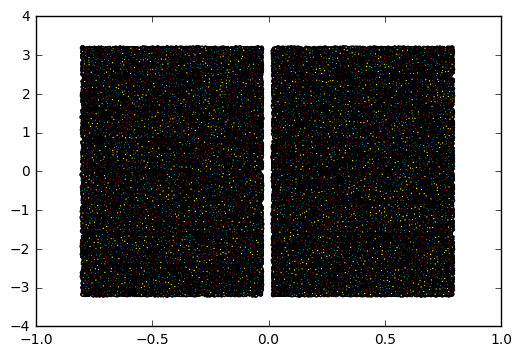

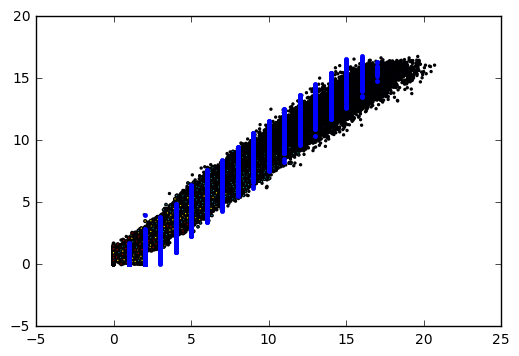

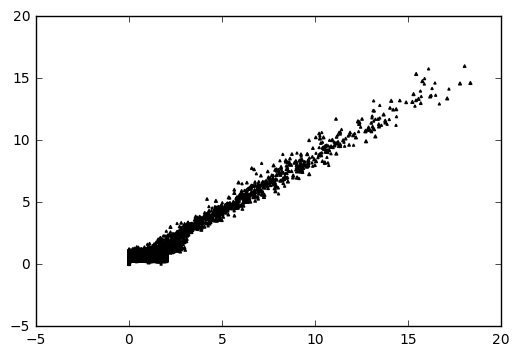

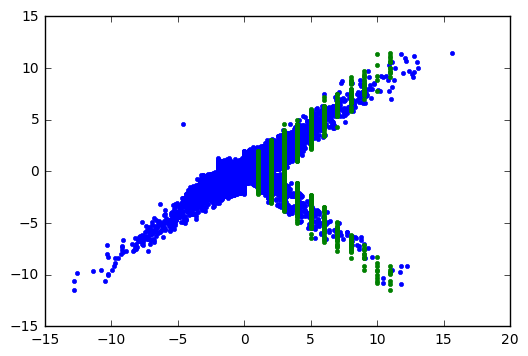

In [21]:
lb = np.ma.masked_where(clus['isBarrel']==0,clus['layer']+1)
le = np.ma.masked_where(clus['isBarrel']==1,clus['layer']+1)
# nn = np.ma.masked_where(np.logical_or(clus['simSY']<5,clus['dy']<clus['simSY']),clus['layer']+1)
plt.scatter(clus['simX'],clus['simY'],s=lb,marker='o',c=clus['layer'])
plt.show()
plt.scatter(clus['dy'],clus['simSY'],s=lb,marker='o',c=clus['layer'])
plt.plot(clus['sy'],clus['simSY'],'.')
plt.show()
plt.scatter(clus['dy'],clus['simSY'],s=le,marker='^',c=clus['layer'])
plt.show()
plt.plot(clus['dx'],clus['simSX'],'.')
plt.plot(clus['sx'],clus['simSX'],'.')
plt.show()

In [28]:
def hist(w) :
    nbins = 100
    y1,xy = np.histogram(clus['sy']-clus['simSY'],np.linspace(-4.,4.,nbins),weights=w, density=True)
    y2,xy = np.histogram(clus['dy']-clus['simSY'],np.linspace(-4.,4.,nbins),weights=w, density=True)
    xy.resize(len(y2))
    x1,xx = np.histogram(abs(clus['sx']-1)-abs(clus['simSX']),np.linspace(-4.,4.,nbins),weights=w, density=True)
    x2,xx = np.histogram(abs(clus['dx'])-abs(clus['simSX']),np.linspace(-4.,4.,nbins),weights=w, density=True)
    x3,xx = np.histogram(clus['dx']-clus['simSX'],np.linspace(-4.,4.,nbins),weights=w*np.greater(clus['sy'],1), density=True)
    xx.resize(len(x2))
    l = np.sqrt(clus['dy']*clus['dy']+clus['dx']*clus['dx'])
    sl = np.sqrt(clus['simSY']*clus['simSY']+clus['simSX']*clus['simSX'])
    ly,lx =  np.histogram(l-sl,np.linspace(-4.,4.,nbins),weights=w, density=True)
    lx.resize(len(ly))
    l2y,l2x =  np.histogram(clus['l2'],np.linspace(0.,4.,nbins),weights=w, density=True)
    l2x.resize(len(l2y))
    ay,ax = np.histogram(clus['sx']*clus['sy'],np.linspace(0.,40.,nbins),weights=w, density=True)
    ax.resize(len(ay))
    
    return xy,y1,y2,xx,x1,x2,x3,lx,ly,l2x,l2y,ax,ay

In [29]:
nbins = 100
isS2 = np.equal(clus['sx'],2)*np.greater(clus['x'],0.5)
isl1 = np.equal(clus['layer'],1)
notl1 = np.logical_not(isl1)
notS1 = np.greater(clus['s'],1)
ok = np.less(clus['l2'],10.)
xy,y1,y2,xx,x1,x2,x3,lx,ly,l2x,l2y,ax,ay = hist((clus['isBarrel']*notS1*ok)) # *isl1)

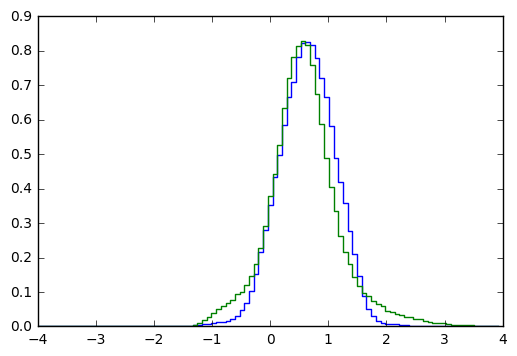

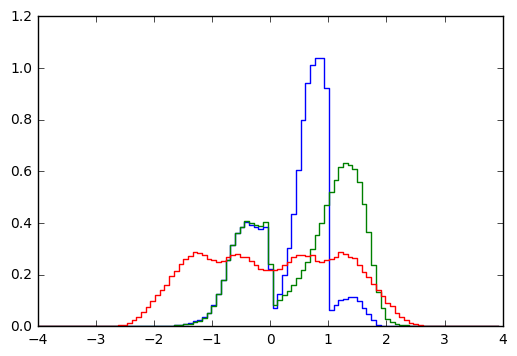

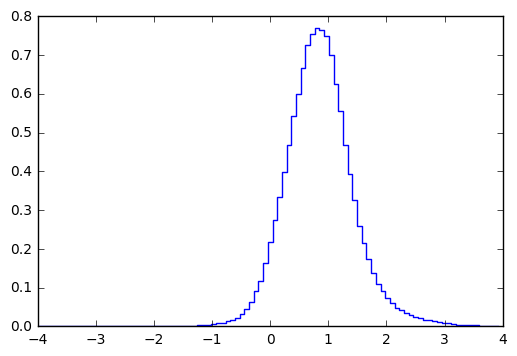

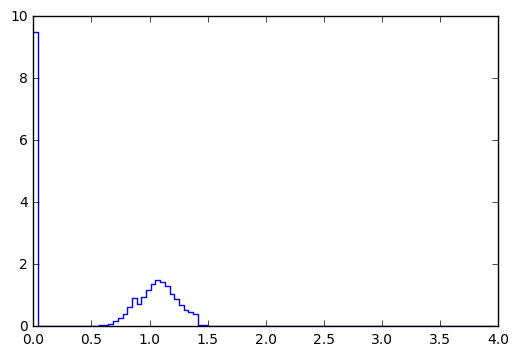

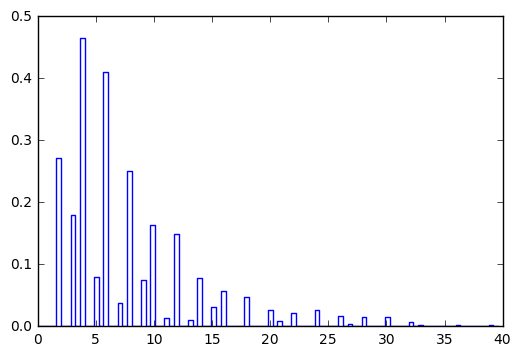

In [30]:
plt.step(xy,y1,where='post')
plt.step(xy,y2,where='post')
plt.show()
plt.step(xx,x1,where='post')
plt.step(xx,x2,where='post')
plt.step(xx,x3,where='post')
plt.show()
plt.step(lx,ly,where='post')
plt.show()
plt.step(l2x,l2y,where='post')
plt.show()
plt.step(ax,ay,where='post')
plt.show()

